In [1]:
# warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing useful libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the data

In [3]:
bs_data = pd.read_csv("day.csv")

In [4]:
# seeing useful information in data
bs_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bs_data.shape   # 730 rows and 16 columns

(730, 16)

In [6]:
bs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# check for duplicates
bs_data.duplicated().sum()   # no duplicates

0

In [8]:
# check for missing values
bs_data.isnull().sum()  # no missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
bs_data["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
# mapping the season values 
bs_data["season"] = bs_data["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [13]:
bs_data["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

### Exploratory Data Analysis (EDA)

In [14]:
# removing the un-necessary columns
bs_data.drop(["instant","dteday","atemp"], axis=1, inplace=True)
# instant column because row numbers is there
# dteday because week and month are given
# atemp because temp and atemp are same

In [15]:
bs_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [16]:
# dividing the columns which are numerical, categorical and target
numeric = ["temp","hum","windspeed","casual","registered"]
categ = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
target = ["cnt"]

### Univariate Analysis

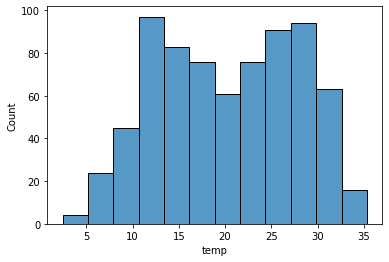

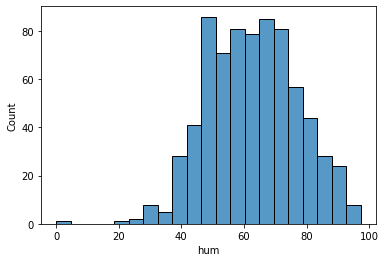

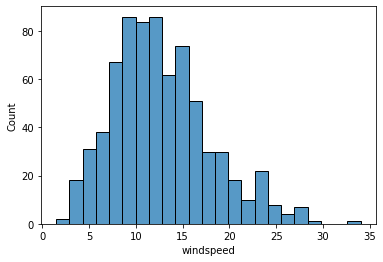

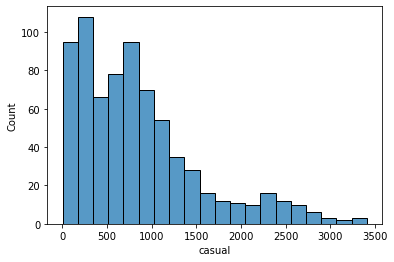

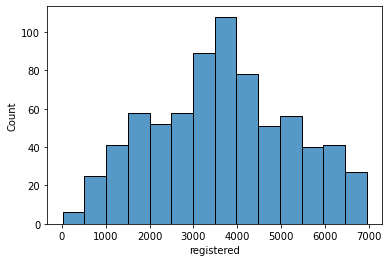

In [17]:
# for numerical columns
for i in numeric:
    sns.histplot(bs_data[i])
    plt.show()

##### for numeric columns
   1. temp has most of the temperature in range between 10-36
   2. hum column i.e humidity most in the range of 40-85
   3. windspeed column most in the range of 5-20
   4. most of the casual users are between 0-1500 per day
   5. most of the registered users are between 1500-5500 per day
   6. registerd users are more as compare to casual

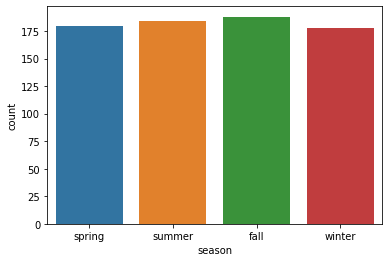

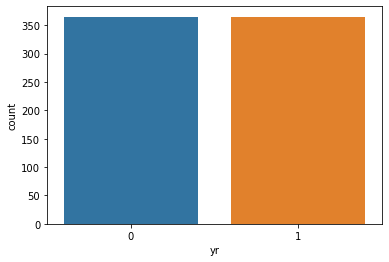

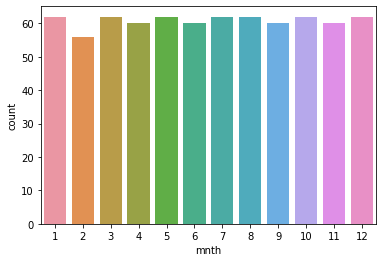

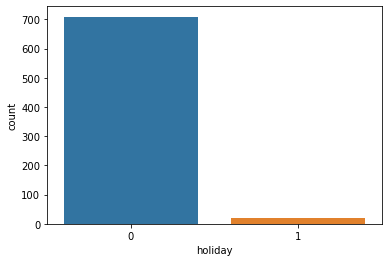

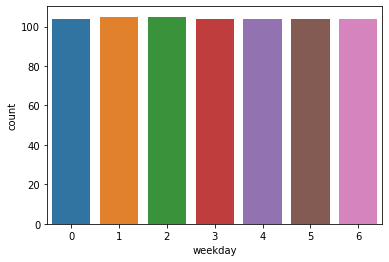

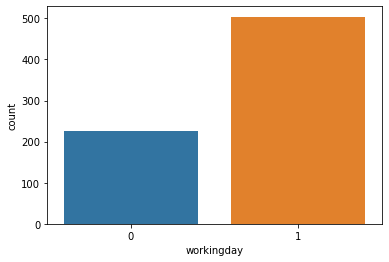

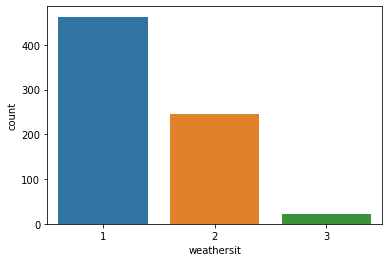

In [18]:
# for categorical columns
for i in categ:
    sns.countplot(bs_data[i])
    plt.show()

##### for categorical columns
   1. holidays are less
   2. workingdays are more
   3. weathersit category is most in the range of 1 and 2

### Bivariate Analysis

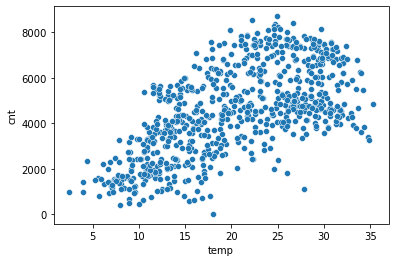

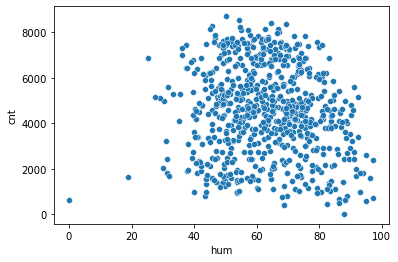

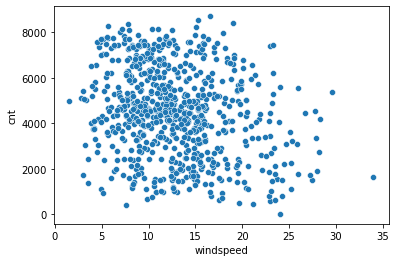

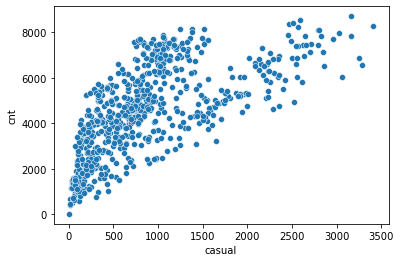

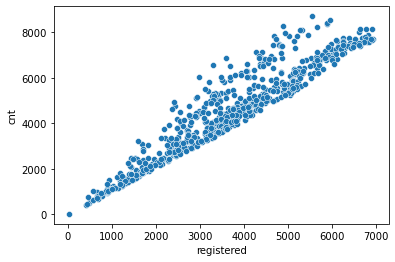

In [19]:
# for numerical vs target column (cnt)
for i in numeric:
    sns.scatterplot(bs_data[i],bs_data["cnt"])
    plt.show()

##### for numeric vs cnt columns
   1. as temperature increases the count of 
      customer increases
   2. customers are less as the windspeed is above 25
   3. as the humidity is less than 30 the customer in this range are very 
      less as compare to humidity > 30

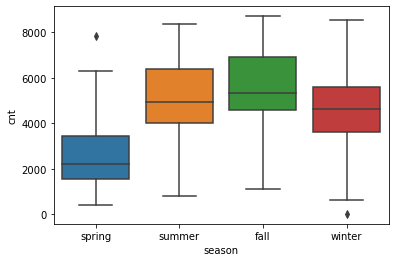

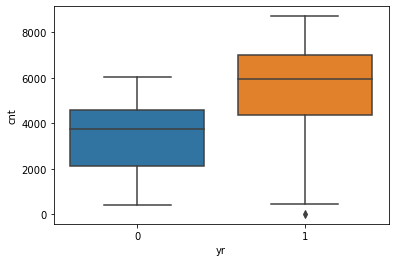

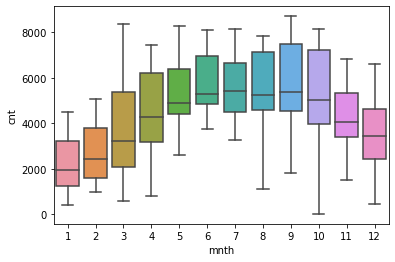

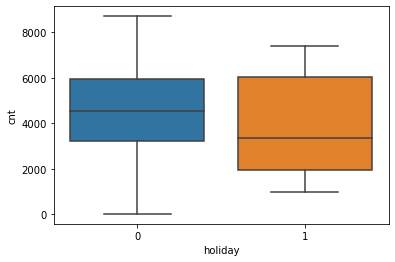

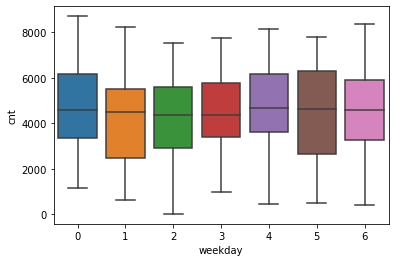

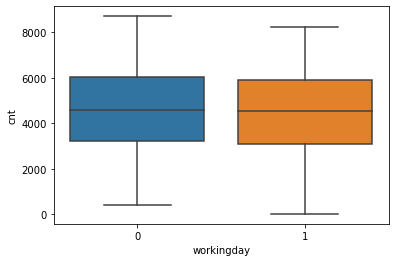

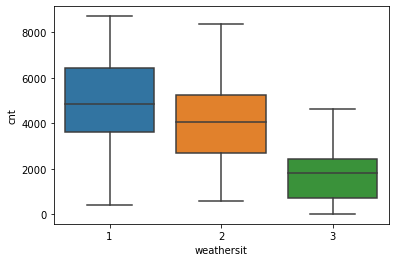

In [20]:
# categ vs target column (cnt)
for i in categ:
    sns.boxplot(bs_data[i], bs_data["cnt"])
    plt.xlabel(i)
    plt.ylabel("cnt")
    plt.show()

##### for categ vs target column (cnt)
   1. customer count is more in summer and fall season and lowest in
      spring season
   2. maximum count of customers is between month 3(march) to 10(october)         and lowest in month 1(january) and 2(february)
   3. maximum count of customers are in weathersit 1(mostly clear) and 
      2(mostly cloudy) weathers and lowest in 3(partly snow & rain)

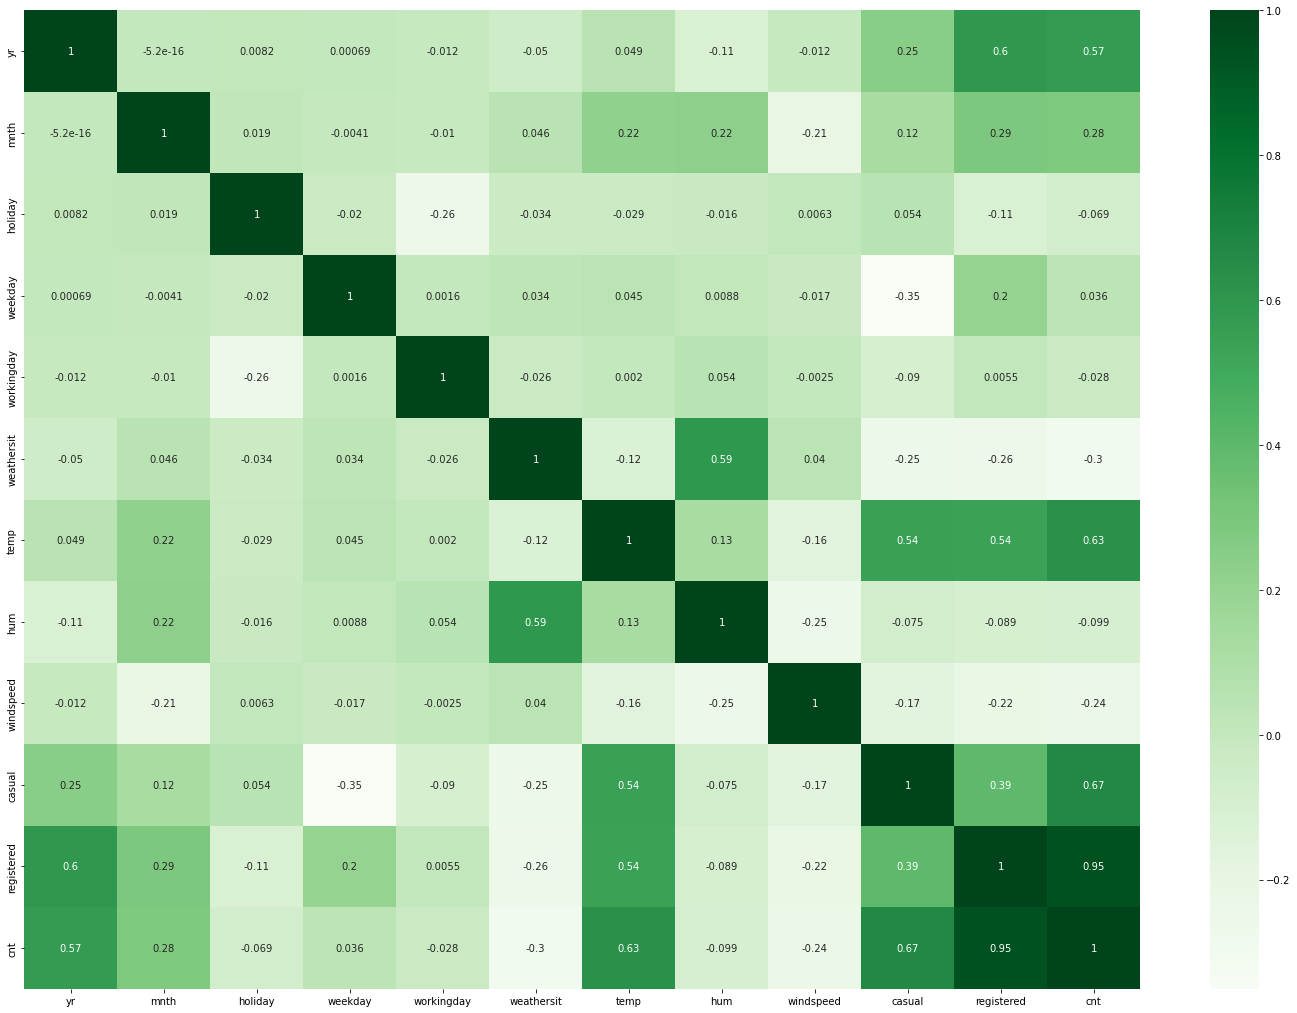

In [21]:
# Heatmap
plt.figure(figsize=(25,18))
sns.heatmap(bs_data.corr(), annot=True, cmap="Greens")
plt.show()

1. in the heatmap there is a higher correlation between temp and cnt
2. there is also correlation between yr and cnt

##### dummy variable creation and dropping the columns that are of no use

In [25]:
bs_data.drop(["casual","registered"], axis=1, inplace=True)
# dropping casual and registered column due to multicollinearity.

In [26]:
# dummy variable creation for season, month, weekday, weathersit columns
dum1 = pd.get_dummies(bs_data["season"], drop_first=True)
dum1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
dum2 = pd.get_dummies(bs_data["mnth"], drop_first=True)
dum2.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [28]:
dum2.rename(columns={2:"feb",3:"march",4:"april",5:"may",6:"june",7:"july",
                    8:"august",9:"september",10:"october",
                    11:"november",12:"december"}, inplace=True)

In [29]:
dum3 = pd.get_dummies(bs_data["weekday"], drop_first=True)
dum3.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [30]:
dum3.rename(columns={1:"monday",2:"tuesday",3:"wednesday",4:"thursday",
                     5:"friday",6:"saturday"}, inplace=True)

In [31]:
dum4 = pd.get_dummies(bs_data["weathersit"], drop_first=True)
dum4.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [32]:
dum4.rename(columns={2:"mostly cloudy",3:"partly snow & rain"}, inplace=True)

In [33]:
# concat them into original dataframe
bs_data = pd.concat([bs_data,dum1,dum2,dum3,dum4], axis=1)

In [34]:
bs_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,november,december,monday,tuesday,wednesday,thursday,friday,saturday,mostly cloudy,partly snow & rain
0,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,1,0,0,0


In [35]:
# dropping the original columns where dummies are derived from
bs_data.drop(["season", "mnth", "weekday", "weathersit"], axis=1,
               inplace=True)

In [37]:
bs_data.shape  # total 29 column remains

(730, 29)

### data preparation for multiple linear regression

In [38]:
# first making X and y variables
X = bs_data.drop(["cnt"], axis=1)
y = bs_data["cnt"]

In [39]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,feb,...,november,december,monday,tuesday,wednesday,thursday,friday,saturday,mostly cloudy,partly snow & rain
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [41]:
# making split for train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [42]:
# checking the shape of train and test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((584, 28), (146, 28), (584,), (146,))

### Scaling the data

In [44]:
# scaling the data using z=(x-xmean)/std formula
x_train = (x_train-x_train.mean())/x_train.std()
x_test = (x_test-x_test.mean())/x_test.std()

In [45]:
# checking the scaled variables
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,feb,...,november,december,monday,tuesday,wednesday,thursday,friday,saturday,mostly cloudy,partly snow & rain
367,0.972135,-0.167693,0.613769,-1.882464,-1.350708,2.234862,1.722701,-0.571588,-0.576856,-0.281685,...,-0.29559,-0.309065,-0.429265,-0.434839,-0.398068,2.420854,-0.423663,-0.368719,-0.721070,-0.167693
648,0.972135,-0.167693,0.613769,-0.306487,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,-0.281685,...,-0.29559,-0.309065,-0.429265,-0.434839,-0.398068,-0.412370,2.356326,-0.368719,-0.721070,-0.167693
44,-1.026903,-0.167693,0.613769,-0.417082,-1.818132,2.902856,1.722701,-0.571588,-0.576856,3.543988,...,-0.29559,-0.309065,-0.429265,-0.434839,2.507830,-0.412370,-0.423663,-0.368719,-0.721070,-0.167693
705,0.972135,-0.167693,-1.626488,-0.937801,0.956630,-0.771166,-0.579490,-0.571588,1.730567,-0.281685,...,-0.29559,3.230029,-0.429265,-0.434839,-0.398068,-0.412370,-0.423663,2.707450,1.384454,-0.167693
379,0.972135,-0.167693,0.613769,-1.790299,-1.508497,0.771778,1.722701,-0.571588,-0.576856,-0.281685,...,-0.29559,-0.309065,-0.429265,2.295763,-0.398068,-0.412370,-0.423663,-0.368719,-0.721070,-0.167693


In [46]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,feb,...,november,december,monday,tuesday,wednesday,thursday,friday,saturday,mostly cloudy,partly snow & rain
184,-0.892733,5.292150,-1.097187,1.101193,0.137062,-1.429568,-0.538549,-0.612188,-0.527995,-0.311568,...,-0.311568,-0.28447,-0.324552,-0.298226,2.246890,-0.385463,-0.337223,-0.549083,1.469362,-0.187665
535,1.112483,-0.187665,0.905179,1.393399,-0.165012,-0.999233,-0.538549,1.622298,-0.527995,-0.311568,...,-0.311568,-0.28447,-0.324552,-0.298226,-0.442011,2.576515,-0.337223,-0.549083,-0.675906,-0.187665
299,-0.892733,-0.187665,-1.097187,-0.242093,1.290418,0.118115,-0.538549,-0.612188,1.880984,-0.311568,...,-0.311568,-0.28447,-0.324552,-0.298226,-0.442011,-0.385463,-0.337223,1.808744,1.469362,-0.187665
221,-0.892733,-0.187665,0.905179,1.310535,-1.271680,0.151322,-0.538549,-0.612188,-0.527995,-0.311568,...,-0.311568,-0.28447,-0.324552,-0.298226,-0.442011,-0.385463,2.945083,-0.549083,-0.675906,-0.187665
152,-0.892733,-0.187665,-1.097187,1.040132,-2.057063,1.376185,-0.538549,1.622298,-0.527995,-0.311568,...,-0.311568,-0.28447,-0.324552,-0.298226,-0.442011,-0.385463,-0.337223,1.808744,-0.675906,-0.187665


### modelling for the data

In [47]:
# feature selection using automated method RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# selecting the 10 columns for the modelling
est=LinearRegression()
select=RFE(est,n_features_to_select=10)
select=select.fit(x_train,y_train)
select.support_

array([ True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True])

In [49]:
selected_cols=[]
for i,j in zip(select.support_,x_train.columns):
    if i==True:
        selected_cols.append(j)

In [50]:
selected_cols

['yr',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'september',
 'mostly cloudy',
 'partly snow & rain']

In [51]:
# putting the variables in train and test variables
x_train = x_train[selected_cols]
x_test= x_test[selected_cols]

In [52]:
# adding constant to x_train and x_test variables
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [53]:
# making the model using Ordinary Least Squares method (OLS)
model_1 = sm.OLS(y_train,x_train)
result_1 = model_1.fit()
result_1.summary()
# model has adjusted R-squared = 0.833 that is great

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.7
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          9.93e-218
Time:                        16:55:59   Log-Likelihood:                -4726.5
No. Observations:                 584   AIC:                             9475.
Df Residuals:                     573   BIC:                             9523.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4505.2671     33.079    136.196      0.000    4440.296    4570.239
yr                   981.3706     33.612     29.197      0.000     915.352    1047.389
temp                1036.9628     61.613     16.830      0.000     915.947    1157.979
hum                 -203.4023     45.873     -4.434      0.000    -293.502    -113.302
windspeed           -259.9366     36.115     -7.197      0.000    -330.871    -189.002
spring              -187.2796     73.315     -2.554      0.011    -331.278     -43.281
summer               269.2963     49.401      5.451      0.000     172.267     366.326
winter               432.7633     58.821      7.357      0.000     317.232     548.294
september            210.3696     35.831      5.871      0.000     139.993     280.746
mostly cloudy       -205.7383     41.674     -4.937      0.000    -287.591    -123.886
partly snow & rain  -341.3494     36.837     -9.267      0.000    -413.701    -268.998
==============================================================================
Omnibus:                       96.588   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.608
Skew:                          -0.850   Prob(JB):                     3.43e-53
Kurtosis:                       5.653   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# checking the variance inflation factor (VIF) of the columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["Feature"]=x_train.columns

vif["VIF"]=[variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif

,Feature,VIF
0,const,1.000000
1,yr,1.030723
2,temp,3.463339
3,hum,1.919813
4,windspeed,1.189952
5,spring,4.903736
6,summer,2.226473
7,winter,3.156521
8,september,1.171280
9,mostly cloudy,1.584426


all the columns in the model has vif < 5 so model is accepted

#### testing the model against test variable

In [55]:
y_pred = result_1.predict(x_test)

In [56]:
# checking the r2 of the predicted variable
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
# model has the gap between r2 score is less so model is accepted

0.7910800123915144


### model evaluation

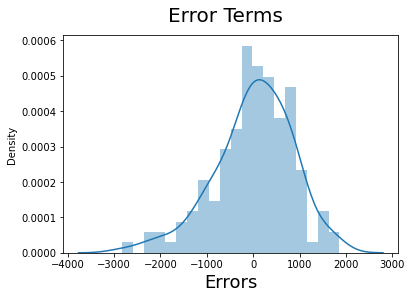

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)  
plt.show()
# errors are normally distributed

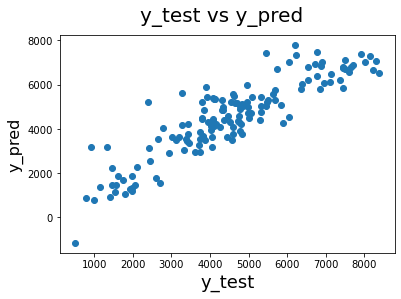

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

In [61]:
# r2 of actual and predicted data
r2_actual = 0.836
r2_predicted = 0.79108